# Naive Bayes & KNN - For Combined Data Set That is Using New Stopwords List
___

## Import Libraries
___

In [131]:
#import libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#setup from sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, \
roc_auc_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#allow visual graphs to be plotted within notebook
%matplotlib inline

## Load in Combined Data File

In [132]:
combined_data_new_stopwords = pd.read_csv('../data/Combined_DF_new_stopwords_for_Naive_Bayes.csv', header=None)

combined_data_new_stopwords.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [133]:
combined_data_new_stopwords.tail()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
1557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1561,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Setup Train/Test Split for Combined Data Set : For Default
___

In [134]:
# Assume that we have decided to use the first 499 columns as predictors for the last column which is the outcome variable
X = combined_data_new_stopwords.iloc[:, 0:1000]

# Negative index means to search from back to front
# -1 means retrieve the last column
y = combined_data_new_stopwords.iloc[:, -1]

In [135]:
#setup the Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=100)

## Baseline Model
___
Our baseline model is by looking at the proportions of post in one category, deciding if it belongs to one category by looking at the majority of the data.

In [136]:
# Baseline Model (Percentage of one over the other)
y.value_counts(normalize = True)


1    0.556338
0    0.443662
Name: 1000, dtype: float64

This indicates to us that our dataset is likely to be alcoholic as there are more 1 (Alcoholic) than 0 (Smoking). Let's evaluate our prediction metrics based on our baseline model.

In [137]:
# Baseline Model Metrics code
base_y_pred = [round(y.value_counts(normalize = True).max())]
base_y_pred

[1]

So it appears our baseline model will predict that all our posts in our data scrape belongs to alcoholics. This will result in approximately 44.3% of our posts misclassified. This will also mean our prediction score is at 0.556. We will use this to compare with our models.

## Combined Data: Using Bernoulli Naive Bayes 

In [138]:
# converts X-column dat 
# Values less than or equal to default threshold value = 0.0 is mapped to 0, else to 1. 
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print('Accuracy Score:')
print(accuracy_score(y_expect, y_pred))
print('\n')
print('train score:', BernNB.score(X_train, y_train))
print('test score:', BernNB.score(X_test, y_test))

BernoulliNB(binarize=True)
Accuracy Score:
0.8005115089514067


train score: 0.8018787361229718
test score: 0.8005115089514067


In [139]:
print(confusion_matrix(y_test, BernNB.predict(X_test)))
print(classification_report(y_test, BernNB.predict(X_test)))

[[166   9]
 [ 69 147]]
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       175
           1       0.94      0.68      0.79       216

    accuracy                           0.80       391
   macro avg       0.82      0.81      0.80       391
weighted avg       0.84      0.80      0.80       391



## Plotting ROC AUC

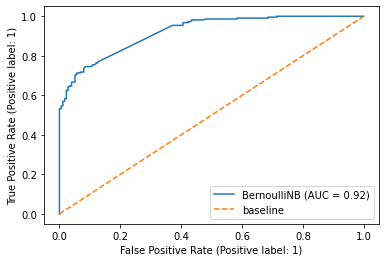

In [140]:
plot_roc_curve(BernNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

**Comparison:** Illustration and matrix above shows a very contrast of what is believed to be accurate.  For the ROC AUC, it shows a score of 0.89 (89%) as the confusion matrix shows an accuracy f1-score of 0.74 (74%).  The score difference between the two can be hypothesis as that although the score is close enough to get the result that we would like to have for our machine to learn, there are still contrast in the training/testing that does not provide a consist answer.  
___

## Combined Data: Using Gaussian Naive Bayes 

In [141]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)


y_pred = GausNB.predict(X_test)
print('Accuracy Score:')
print(accuracy_score(y_expect, y_pred))
print('\n')
print('train score:', GausNB.score(X_train, y_train))
print('test score:', GausNB.score(X_test, y_test))

GaussianNB()
Accuracy Score:
0.8081841432225064


train score: 0.8454312553373186
test score: 0.8081841432225064


In [142]:
print(confusion_matrix(y_test, GausNB.predict(X_test)))
print(classification_report(y_test, GausNB.predict(X_test)))

[[163  12]
 [ 63 153]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       175
           1       0.93      0.71      0.80       216

    accuracy                           0.81       391
   macro avg       0.82      0.82      0.81       391
weighted avg       0.84      0.81      0.81       391



## Plotting ROC AUC

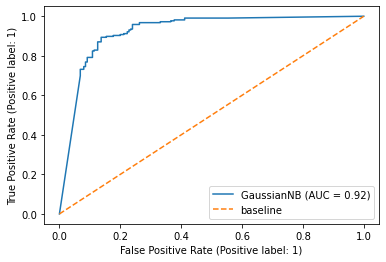

In [143]:

plot_roc_curve(GausNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

**Comparison:** Illustration and matrix above shows a very contrast of what is believed to be accurate like the Bernoulli Naive Bayes model.  For the ROC AUC, it shows a score of 0.93 (93%) as the confusion matrix shows an accuracy f1-score of 0.80 (80%).  The score difference between the two can be hypothesis the same as Bernoulli's too.  
___

## Combined Data: Using Multinomial Naive Bayes 

In [144]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)


y_pred = MultiNB.predict(X_test)
print('Accuracy Score:')
print(accuracy_score(y_expect, y_pred))
print('\n')
print('train score:', MultiNB.score(X_train, y_train))
print('test score:', MultiNB.score(X_test, y_test))

MultinomialNB()
Accuracy Score:
0.959079283887468


train score: 0.9632792485055508
test score: 0.959079283887468


In [145]:
print(confusion_matrix(y_test, MultiNB.predict(X_test)))
print(classification_report(y_test, MultiNB.predict(X_test)))

[[171   4]
 [ 12 204]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       175
           1       0.98      0.94      0.96       216

    accuracy                           0.96       391
   macro avg       0.96      0.96      0.96       391
weighted avg       0.96      0.96      0.96       391



## Plotting ROC AUC

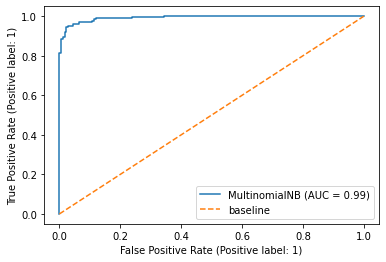

In [146]:

plot_roc_curve(MultiNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

**Comparison:** Illustration and matrix above shows a very strong consistency.  For the ROC AUC, it shows a score of 0.99 (99%) as the confusion matrix shows an accuracy f1-score of 0.95 (95%).  The score difference between the two so within the marginal error that can be expected. This also means that this model is the best to use for the machine to adopt on.  
___
After testing all three version of Naive Bayes, Multinomial had the best result with 0.9463

## Optimize the Bernoulli Naive Bayes

In [147]:
# Optimal results when you set binarize=0.1. This was found through trial and error.
# Values less than or equal to 0.1 is mapped to 0, else to 1.
# You may also consider using Hyperparameter Tuning techniques such as GridSearch to find the optimal threshold value
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=0.1)
0.9028132992327366


**Result and compare:** Since Bernoulli Naive Bayes had the worst score compared to Gaussian and Multinomial, trying to optimize it to see if it can match up with the other two was tested.  As in result, its score improved by around 0.08.

Compare to the base model which the initial score was 0.68 and 0.86 after optimization.

## Plotting ROC AUC

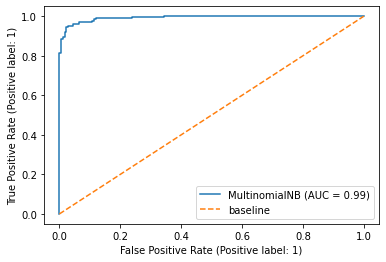

In [148]:

plot_roc_curve(MultiNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

## Method 2: Using KNN for Confusion Matrix and Classification Report

In [149]:
#impor library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [150]:
#create instance for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [151]:
#fit the knn to both X and y trains
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [152]:
#set pred variable to knn.predict for X_test
pred = knn.predict(X_test)

In [153]:
#print out results for both confusion matrix and classification report
print('This is the Confusion Matrix:')
print(confusion_matrix(y_test, pred))
print('\n')
print('This is the Classification Report:')
print(classification_report(y_test, pred))

This is the Confusion Matrix:
[[101  74]
 [ 23 193]]


This is the Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.58      0.68       175
           1       0.72      0.89      0.80       216

    accuracy                           0.75       391
   macro avg       0.77      0.74      0.74       391
weighted avg       0.76      0.75      0.74       391



___
The accuracy of the KNN model is not up to our standard as the it still give a 25% chance of error.  Further optimization will need to be done to see if it can improve this score.
___

## Using Gridsearch to find a more accurate n_neighbors number

In [154]:
# Set up experiment with taining and test data for X and Y values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=0)

In [155]:
# Instantiate Basic Knn with initial k value
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=3)

In [156]:
# Evaluate and display mean accuracy of Basic Knn on test data
knn.score(X_test2, y_test2)

0.7672634271099744

In [157]:
# Set up Gridsearch with preferred n_neighbours range and preferred CV value
num_range = range(1,40)
params = {"n_neighbors":num_range}
model = GridSearchCV(knn, params, cv=5)

In [158]:
#fit model with new information
model.fit(X_train2, y_train2)
model.best_params_

{'n_neighbors': 22}

In [159]:
# Knn with 5 neighbors
gridsearch_knn = KNeighborsClassifier(n_neighbors = 23)
gridsearch_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [160]:
#do a gridsearch using X_test
gridsearch_y_pred = gridsearch_knn.predict(X_test)

#showcase the predicted y through gridsearch
print(gridsearch_y_pred)

[1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0
 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1
 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0
 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1
 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1
 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1
 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


In [161]:
#print out results for both confusion matrix and classification report
print('This is the Confusion Matrix:')
print(confusion_matrix(y_test, gridsearch_y_pred))
print('\n')
print('This is the Classification Report:')
print(classification_report(y_test, gridsearch_y_pred))

This is the Confusion Matrix:
[[129  46]
 [ 10 206]]


This is the Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       175
           1       0.82      0.95      0.88       216

    accuracy                           0.86       391
   macro avg       0.87      0.85      0.85       391
weighted avg       0.87      0.86      0.85       391



___
**Result & Compare:**
After using Gridsearch to find the most accurate n_neighbors number. (n_neighbors = 23). The new accuracy went up by 0.04 which is better compare from before but the Multinomial Naive Bayes still provided the best results compare to others. Compare to the based version which start with 0.60 then 0.69.
___

### Cross Validation

In [162]:
#import library
from sklearn.model_selection import cross_val_score

#find mean for cross validation
cross_val_score(knn, X_train, y_train, cv=5).mean()

0.781418439716312

In [163]:
#fit KNN
knn.fit(X_train, y_train)

#find score for KNN for train
knn.score(X_train, y_train)

0.9342442356959864

In [164]:
#find score for KNN for test
knn.score(X_test, y_test)

0.8107416879795396

In [165]:
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

[[117  58]
 [ 16 200]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       175
           1       0.78      0.93      0.84       216

    accuracy                           0.81       391
   macro avg       0.83      0.80      0.80       391
weighted avg       0.82      0.81      0.81       391



## Plotting ROC AUC

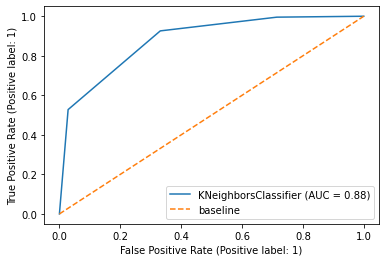

In [166]:
plot_roc_curve(knn, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

We have a ROC AUC of 0.88, thus this indicates to us that KNN model is close to being perfectly separated. This indicates that KNN model also has a high level of accuracy in prediction results for our model.

In our confusion matrix, KNN model performs not as well, with precision, recall and f1-scores ranging from 0.81. The train and test scores have a high contrast of scoring between the two. This indicates that there are probably quite a bit of outfitters that are skewing the result.

Compare to the base model from Step 4.1, there is still a significant increase in score value which tell us that by removing additional unnecessary words will increase the score which also increase the efficiency for the machine to learn and adopt to.  